### Assignment 7 : SVM Kernel Optimization with RBF Gaussian Kernel

Name   : Sriram Veturi
UIN    : 651427659
Course : ECE/CS 559 Neural Networks

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix as optimizationMatrix
from cvxopt import solvers as optimizationSolver
plt.style.use('ggplot')

#### Lets say the sample size is 100.

In [19]:
sampleSize = 100
np.random.seed(444)
inputPattern = np.random.uniform(low=0, high=1, size=(sampleSize, 2))

The following plot shows the random points selected.

No handles with labels found to put in legend.


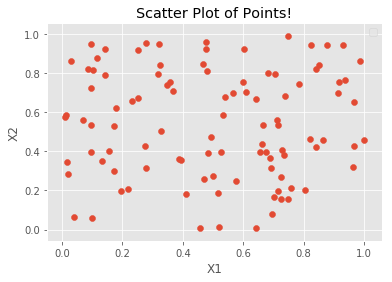

In [21]:
xCoordinates = inputPattern[:, 0]
yCoordinates = inputPattern[:, 1]

plt.title('Scatter Plot of Points!')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(xCoordinates, yCoordinates)
plt.legend(loc='best')
plt.show(True)

Given Xi = [Xi1 Xi2], let
di = 1 if Xi2 < (1/5)sin(10Xi1) + 0.3 or (Xi2 - 0.8)^2 + (Xi1 - 0.5)^2 < 0.15^2
and 
di = -1 if above condition fails

In [22]:
d, posClass, negClass = list(), list(), list()

for inp in inputPattern:
    if (inp[1] < (((1/5) * np.sin(10 * inp[0])) + 0.3)) or (((inp[1] - 0.8) ** 2) + ((inp[0] - 0.5) ** 2) < ((0.15) ** 2)):
        posClass.append(inp)
        d.append(1)
    else:
        negClass.append(inp)
        d.append(-1)

#### Separating the positive and negative classes.

In [23]:
negativeClass = [sample[0] for sample in zip(inputPattern, d) if sample[1] == 1]
positiveClass = [sample[0] for sample in zip(inputPattern, d) if sample[1] == -1]
negativeClass = np.array(negativeClass)
positiveClass = np.array(positiveClass)

#### Plot to show the positive(in red) and negative(in blue) classes.

No handles with labels found to put in legend.


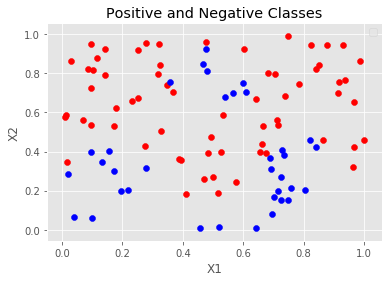

In [24]:
positiveClassX = positiveClass[:, 0]
positiveClassY = positiveClass[:, 1]
plt.scatter(positiveClassX, positiveClassY, color='red')

negativeClassX = negativeClass[:, 0]
negativeClassY = negativeClass[:, 1]
plt.scatter(negativeClassX, negativeClassY, color='blue')
plt.title('Positive and Negative Classes')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.show(True)

In [25]:
var = inputPattern.var()
var

0.07914569028276407

Definitely, linear kernel would fail as the data is not linearly separable. So, lets try only Gaussian and Polynomial.

In [26]:
def polynomialKernel(xi, xj, degree=5):
    kernel = (1 + np.dot(xi, xj)) ** degree
    return kernel

def rbfGaussianKernel(xi, xj, variance=1.0):
    kernel = (np.exp(-np.linalg.norm(xi - xj) ** 2 / (2 * (variance ** 2))))
    return kernel

In [27]:
y = np.asarray(d).astype(float)

In [28]:
kernelFunction = np.empty((sampleSize, sampleSize))
for i in range(sampleSize):
    for j in range(sampleSize):
        kernelFunction[i, j] = rbfGaussianKernel(inputPattern[i], inputPattern[j])

Converting the dual form format to the cvxopt format.

In [29]:
P = optimizationMatrix(np.outer(y,y) * kernelFunction)
q = optimizationMatrix(np.ones(sampleSize) * -1)
A = optimizationMatrix(y, (1,sampleSize))
b = optimizationMatrix(0.0)
G = optimizationMatrix(np.diag(np.ones(sampleSize) * -1))
h = optimizationMatrix(np.zeros(sampleSize))

Running the solver to get alphas and set the threshold to 1e-5.

In [30]:
solution = optimizationSolver.qp(P, q, G, h, A, b)
alpha = np.ravel(solution['x'])
threshold = 1e-5
supportVectors = alpha > threshold

     pcost       dcost       gap    pres   dres
 0: -6.9917e+01 -2.0205e+02  1e+02  4e-16  3e+00
 1: -1.3248e+02 -1.4986e+02  2e+01  4e-15  1e+00
 2: -4.1068e+02 -4.5169e+02  4e+01  1e-14  1e+00
 3: -2.3876e+03 -2.5271e+03  1e+02  8e-14  1e+00
 4: -7.8741e+03 -8.2387e+03  4e+02  4e-13  1e+00
 5: -3.8722e+04 -4.0512e+04  2e+03  2e-12  1e+00
 6: -5.9987e+04 -6.2658e+04  3e+03  5e-12  1e+00
 7: -1.5077e+05 -1.5734e+05  7e+03  2e-11  1e+00
 8: -3.3878e+05 -3.5374e+05  1e+04  1e-11  1e+00
 9: -3.9128e+05 -4.0833e+05  2e+04  3e-11  1e+00
10: -9.1975e+05 -9.5955e+05  4e+04  1e-10  1e+00
11: -2.0942e+06 -2.2087e+06  1e+05  1e-10  1e+00
12: -4.9091e+06 -5.3024e+06  4e+05  4e-10  1e+00
13: -1.1004e+07 -1.2336e+07  1e+06  1e-09  1e+00
14: -1.5913e+07 -1.8237e+07  2e+06  2e-09  9e-01
15: -2.2646e+07 -2.6703e+07  4e+06  3e-09  8e-01
16: -3.7851e+07 -4.6767e+07  9e+06  2e-08  6e-01
17: -4.3521e+07 -5.0802e+07  7e+06  1e-08  3e-01
18: -4.4782e+07 -4.8305e+07  4e+06  2e-08  7e-02
19: -4.6036e+07 -4.62

Compute the support vectors.

In [31]:
posSupportX, negSupportX, posSupportY, negSupportY = list(), list(), list(), list()

for i in range(sampleSize):
    if alpha[i] > threshold:
        if y[i] == 1:
            posSupportX.append(inputPattern[i])
            posSupportY.append(y[i])
        elif y[i] == -1:
            negSupportX.append(inputPattern[i])
            negSupportY.append(y[i])
            
supportX = posSupportX + negSupportX
supportY = posSupportY + negSupportY

In [32]:
theta = supportY[1]
for i in range(sampleSize):
    delta = alpha[i] * y[i] * rbfGaussianKernel(inputPattern[i], supportX[1])
    theta -= delta

Prepare to plot the SVM separating the points.

In [37]:
xPlane = np.linspace(0.0, 1.0, 500)
yPlane = np.linspace(0.0, 1.0, 500)
hyperplane, hyperPlus, hyperMinus = list(), list(), list()

In [38]:
iteration = 1
for i in range(500):
    for j in range(500):
        gx = theta
        
        for sample in range(sampleSize):
            planeCoordinates = np.asarray([xPlane[i], yPlane[j]])
            kernelOutput = rbfGaussianKernel(inputPattern[sample], planeCoordinates)
            increm = alpha[sample] * y[sample] * kernelOutput
            gx += increm
            
        # Hyperplane boundary
        if gx > -0.1 and gx < 0.1:
            coords = [xPlane[i], yPlane[j]]
            hyperplane.append(coords)
            
        # Positive Hyperplane boundary
        elif gx > 0.9 and gx < 1.1:
            coords = [xPlane[i], yPlane[j]]
            hyperPlus.append(coords)
            
        # Negative Hyperplane boundary
        elif gx > -1.1 and gx < -0.9:
            coords = [xPlane[i], yPlane[j]]
            hyperMinus.append(coords)
        
    #print(iteration)
    iteration += 1

#### Gaussian Kernel SVM Plot with Sigma as Variance

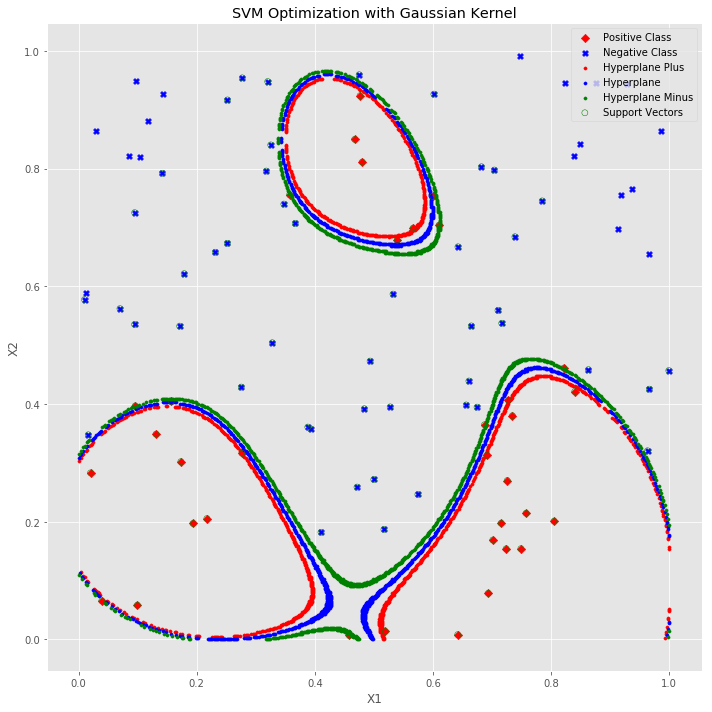

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('SVM Optimization with Gaussian Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
posClass = np.array(posClass)
a = []
b = []
for x in posClass:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, color = 'red', marker = 'D', label = 'Positive Class')
negClass = np.array(negClass)
a = []
b = []
for x in negClass:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, color = 'blue', marker = 'X', label = 'Negative Class')
hyperPlus = np.array(hyperPlus)
a = []
b = []
for x in hyperPlus:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, color = 'red', s=10, label = 'Hyperplane Plus')
hyperplane = np.array(hyperplane)
a = []
b = []
for x in hyperplane:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, color = 'blue', s=10, label = 'Hyperplane')
hyperMinus = np.array(hyperMinus)
a = []
b = []
for x in hyperMinus:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, color = 'green', s=10, label = 'Hyperplane Minus')
supportX = np.array(supportX)
a = []
b = []
for x in supportX:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, facecolors = 'none', edgecolors='green',label='Support Vectors')
plt.legend(loc='best')
plt.tight_layout()
plt.show(True)

In [19]:
kernelFunction = np.empty((sampleSize, sampleSize))
for i in range(sampleSize):
    for j in range(sampleSize):
        kernelFunction[i, j] = polynomialKernel(inputPattern[i], inputPattern[j])

In [20]:
P = optimizationMatrix(np.outer(y,y) * kernelFunction)
q = optimizationMatrix(np.ones(sampleSize) * -1)
A = optimizationMatrix(y, (1,sampleSize))
b = optimizationMatrix(0.0)
G = optimizationMatrix(np.diag(np.ones(sampleSize) * -1))
h = optimizationMatrix(np.zeros(sampleSize))

In [21]:
solution = optimizationSolver.qp(P, q, G, h, A, b)
alpha = np.ravel(solution['x'])
threshold = 1e-5
supportVectors = alpha > threshold

     pcost       dcost       gap    pres   dres
 0: -6.0523e+01 -1.5771e+02  4e+02  1e+01  3e+00
 1: -2.2923e+02 -3.5287e+02  2e+02  8e+00  1e+00
 2: -7.5409e+02 -9.4750e+02  2e+02  7e+00  1e+00
 3: -1.8953e+03 -2.2566e+03  4e+02  7e+00  1e+00
 4: -4.7950e+03 -5.4733e+03  7e+02  6e+00  1e+00
 5: -1.0474e+04 -1.1689e+04  1e+03  6e+00  1e+00
 6: -1.8630e+04 -2.0585e+04  2e+03  6e+00  1e+00
 7: -4.6232e+04 -5.0872e+04  5e+03  6e+00  1e+00
 8: -1.0635e+05 -1.1883e+05  1e+04  6e+00  1e+00
 9: -2.1369e+05 -2.4497e+05  3e+04  6e+00  9e-01
10: -3.6809e+05 -4.3790e+05  7e+04  5e+00  8e-01
11: -5.1129e+05 -6.3556e+05  1e+05  4e+00  7e-01
12: -7.0981e+05 -8.4807e+05  1e+05  2e+00  3e-01
13: -7.4123e+05 -7.4936e+05  8e+03  1e-10  2e-09
14: -7.4585e+05 -7.4612e+05  3e+02  1e-10  3e-09
15: -7.4599e+05 -7.4599e+05  3e+00  2e-10  3e-09
16: -7.4599e+05 -7.4599e+05  3e-02  4e-10  2e-09
Optimal solution found.


In [22]:
posSupportX, negSupportX, posSupportY, negSupportY = list(), list(), list(), list()

for i in range(sampleSize):
    if alpha[i] > threshold:
        if y[i] == 1:
            posSupportX.append(inputPattern[i])
            posSupportY.append(y[i])
        elif y[i] == -1:
            negSupportX.append(inputPattern[i])
            negSupportY.append(y[i])
            
supportX = posSupportX + negSupportX
supportY = posSupportY + negSupportY

In [23]:
theta = supportY[1]
for i in range(sampleSize):
    delta = alpha[i] * y[i] * polynomialKernel(inputPattern[i], supportX[1])
    theta -= delta

In [28]:
xPlane = np.linspace(0.0, 1.0, 500)
yPlane = np.linspace(0.0, 1.0, 500)
hyperplane, hyperPlus, hyperMinus = list(), list(), list()

In [29]:
iteration = 1
for i in range(500):
    for j in range(500):
        gx = theta
        
        for sample in range(sampleSize):
            planeCoordinates = np.asarray([xPlane[i], yPlane[j]])
            kernelOutput = polynomialKernel(inputPattern[sample], planeCoordinates)
            increm = alpha[sample] * y[sample] * kernelOutput
            gx += increm
            
        # Hyperplane boundary
        if gx > -0.1 and gx < 0.1:
            coords = [xPlane[i], yPlane[j]]
            hyperplane.append(coords)
            
        # Positive Hyperplane boundary
        elif gx > 0.9 and gx < 1.1:
            coords = [xPlane[i], yPlane[j]]
            hyperPlus.append(coords)
            
        # Negative Hyperplane boundary
        elif gx > -1.1 and gx < -0.9:
            coords = [xPlane[i], yPlane[j]]
            hyperMinus.append(coords)
        
    #print(iteration)
    iteration += 1

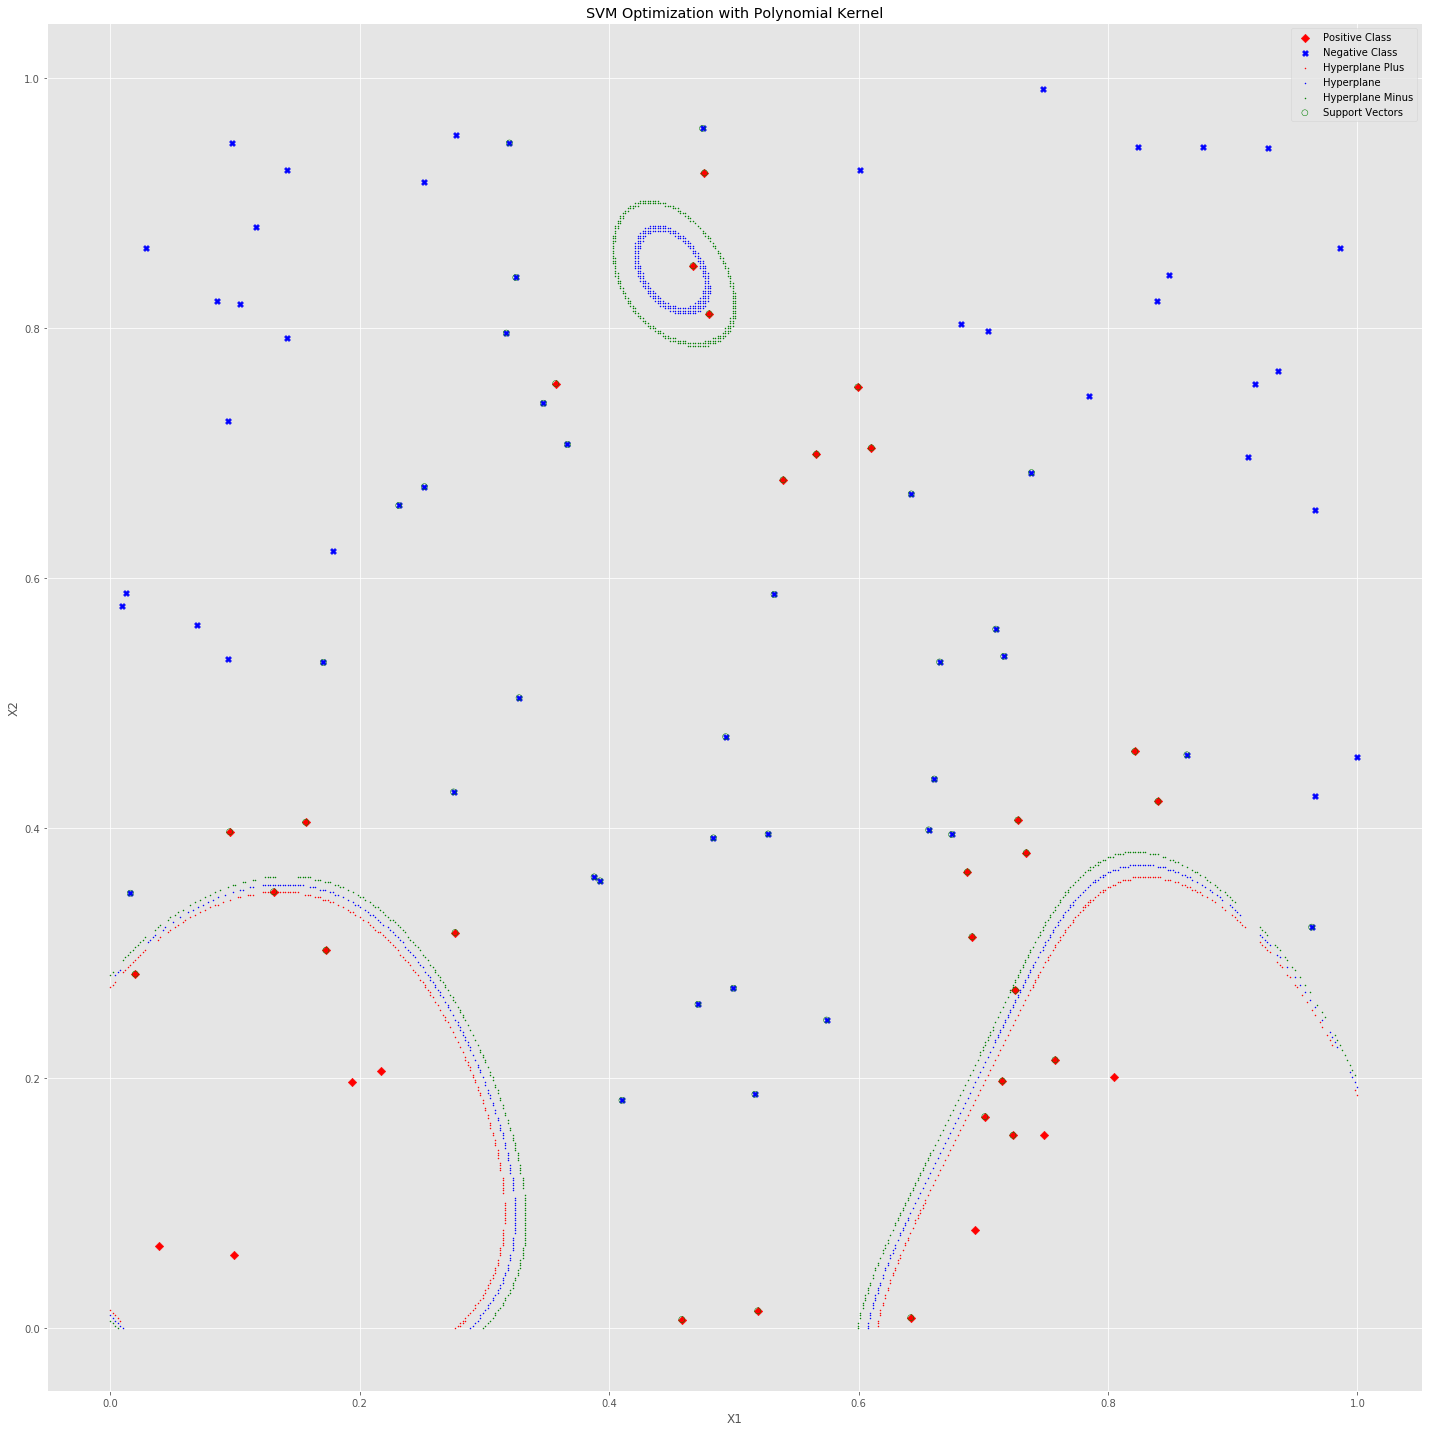

In [42]:
fig, ax = plt.subplots(figsize=(20,20))
plt.title('SVM Optimization with Polynomial Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
posClass = np.array(posClass)
a = []
b = []
for x in posClass:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, color = 'red', marker = 'D', label = 'Positive Class')
negClass = np.array(negClass)
a = []
b = []
for x in negClass:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, color = 'blue', marker = 'X', label = 'Negative Class')
hyperPlus = np.array(hyperPlus)
a = []
b = []
for x in hyperPlus:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, color = 'red', s=1, label = 'Hyperplane Plus')
hyperplane = np.array(hyperplane)
a = []
b = []
for x in hyperplane:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, color = 'blue', s=1, label = 'Hyperplane')
hyperMinus = np.array(hyperMinus)
a = []
b = []
for x in hyperMinus:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, color = 'green', s=1, label = 'Hyperplane Minus')
supportX = np.array(supportX)
a = []
b = []
for x in supportX:
    a.append(x[0])
    b.append(x[1])
plt.scatter(a, b, facecolors = 'none', edgecolors='green',label='Support Vectors')
plt.legend(loc='best')
plt.tight_layout()
plt.show(True)

#### Clearly, Gaussian Kernel performed better that Polynomial Kernel in my case where the random seed was set to 444. Although, I have experimented on a very limited amount of thresholds and other parameters, I believe that there could be a case with some other random seed where even Polynomial Kernel could perform better than what you could see in the above figure. With this I conclude that for my random points, I chose RBF Gaussian Kernel for my SVM optimization problem. 